In [2]:
import pandas as pd
import numpy as np
from eodhd import APIClient
import sys
sys.path.insert(0, "/Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src")
from Features import fundamental_features_new, fundamental_features, technical_features
import talib
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import sklearn
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import optuna
from optuna import Trial
import shap

In [3]:
zacks_fc = pd.read_csv("../data/fundamental_data/ZACKS_FC.csv", delimiter=',')
zacks_fc['per_end_date'] = pd.to_datetime(zacks_fc['per_end_date'])
zacks_fc['per_end_date'] = zacks_fc['per_end_date'].dt.tz_localize('US/Eastern')
zacks_fc['filing_date'] = pd.to_datetime(zacks_fc['filing_date'])
zacks_fc['filing_date'] = zacks_fc['filing_date'].dt.tz_localize('US/Eastern')
zacks_fc = zacks_fc.sort_values('per_end_date').set_index('per_end_date')

zacks_fr = pd.read_csv("../data/fundamental_data/ZACKS_FR.csv", delimiter=',')
zacks_fr['per_end_date'] = pd.to_datetime(zacks_fr['per_end_date'])
zacks_fr['per_end_date'] = zacks_fr['per_end_date'].dt.tz_localize('US/Eastern')
zacks_fr = zacks_fr.sort_values('per_end_date').set_index('per_end_date')

data = {
    "zacks_fc": zacks_fc,
    "zacks_fr": zacks_fr
}

C:\Users\manis\AppData\Local\Temp\ipykernel_36744\3539703636.py:1: DtypeWarning: Columns (4,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  zacks_fc = pd.read_csv("../data/fundamental_data/ZACKS_FC.csv", delimiter=',')
C:\Users\manis\AppData\Local\Temp\ipykernel_36744\3539703636.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  zacks_fr = pd.read_csv("../data/fundamental_data/ZACKS_FR.csv", delimiter=',')


In [ ]:
tickers_df = pd.read_excel(r"C:/Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/data/sp1500_cleaned.xlsx")
tickers = tickers_df['ticker'].tolist()
len(tickers)

1506

: 

In [ ]:
combined_features = []
for ticker in tickers[:100]:
    data = {
    "zacks_fc": zacks_fc,
    "zacks_fr": zacks_fr
    }
    try:
        print(f"Processing ticker: {ticker}")
        obj = fundamental_features_new.BuildFeatures(data, ticker)
        obj.process_financial_statements()
        obj.extend_monthly()
        
        tech = technical_features.BuildFeatures(ticker)
        tech.build_technical_features()
        tech.technical_features.index = tech.technical_features.index.tz_convert('US/Eastern')

        df = pd.merge_asof(obj.fundamental_features, tech.technical_features, 
                           left_index=True, right_index=True, direction='nearest')

        df['ticker'] = ticker  
        
        combined_features.append(df)
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

Processing ticker: VRSK


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\fundamental_features_new.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.fundamental_features.loc[:, "eps"].fillna(self.data['zacks_fc'].loc[:, "basic_net_eps"], inplace=True)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\fundamental_features_new.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future 

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing VRSK: Merge keys contain null values on left side
Processing ticker: EVTC


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing EVTC: Merge keys contain null values on left side
Processing ticker: AA


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing AA: Merge keys contain null values on left side
Processing ticker: PFG


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: NXPI


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing NXPI: Merge keys contain null values on left side
Processing ticker: CELH


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing CELH: Merge keys contain null values on left side
Processing ticker: AXP


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: VZ


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: BA


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing BA: Merge keys contain null values on left side
Processing ticker: RCL


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing RCL: Merge keys contain null values on left side
Processing ticker: DOW


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing DOW: Merge keys contain null values on left side
Processing ticker: CAT


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: SCVL


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: JPM


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing JPM: Merge keys contain null values on left side
Processing ticker: CVX


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: LII


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing LII: Merge keys contain null values on left side
Processing ticker: EME


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: KO


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: DIS


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: PSX


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Error processing PSX: Merge keys contain null values on left side
Processing ticker: XOM


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: ALG


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: GE


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: HPQ


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: HD


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: IBM


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: DXCM


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: JNJ


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

Error: Moving_Average_Convergence/Divergence_Fix_12/26
Error: Stochastic
Error: Stochastic_Fast
Error: Stochastic_RSI
Processing ticker: MCD


c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:497: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Variance"] = talib.VAR(self.stock["Close"], timeperiod=5, nbdev=1)
c:\Users/manis/Desktop/UChicago Docs/Winter Quarter/Project Lab 36001/Factor-Research/src\Features\technical_features.py:500: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.technical_features["Weighted_Close_Price"] = talib.WCLPRICE(self.stock["High"], self.stock["L

In [ ]:
combined_features[0]

,total revenue,ebitda,eps,Dividend Payout Ratio,total_current_assets,,m_ticker,ticker,comp_name,comp_name_2,...,Midpoint_Price_over_period,Lowest_value_over_period,Index_of_lowest_value_over_period,Highest_value_over_period,Index_of_highest_value_over_period,Summation,Triple_Exponential_Moving_Average,Triple_Exponential_Moving_Average_Oscillator,True_Range,Close_Price
filing_date,,,,,,,,,,,,,,,,,,,,,
2006-04-30 20:00:00-04:00,2402.20000000,467.39980000,1.01000000,NaN,2281.80000000,NaN,PFG2,PFG,Principal Financial Group,"Principal Financial Group, Inc.",...,28.64779952,27.79959297,1127,29.41034126,1135,853.96202469,29.20274442,29.08256377,0.47407392,28.97052765
2006-05-31 20:00:00-04:00,2402.20000000,467.39980000,1.01000000,NaN,2281.80000000,NaN,PFG2,PFG,Principal Financial Group,"Principal Financial Group, Inc.",...,30.34993466,29.58740234,1150,31.21528053,1158,899.65681458,30.83992915,30.97544911,0.54262398,31.10104561
2006-06-30 20:00:00-04:00,2402.20000000,467.39980000,1.01000000,NaN,2281.80000000,NaN,PFG2,PFG,Principal Financial Group,"Principal Financial Group, Inc.",...,30.87255790,29.88442421,1167,31.78644943,1180,918.72863770,30.96858421,30.99657861,0.53689760,31.78644943
2006-07-31 20:00:00-04:00,2459.80000000,386.50010000,0.76000000,NaN,1843.70000000,NaN,PFG2,PFG,Principal Financial Group,"Principal Financial Group, Inc.",...,30.62124871,30.22141457,1201,31.01535225,1195,929.90100861,30.73986184,30.73127902,0.78822574,30.22141457
2006-08-31 20:00:00-04:00,2459.80000000,386.50010000,0.76000000,NaN,1843.70000000,NaN,PFG2,PFG,Principal Financial Group,"Principal Financial Group, Inc.",...,30.58697105,30.22711754,1219,30.92968750,1213,915.88414192,30.34418943,30.26789958,0.15993118,30.32993698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 20:00:00-04:00,4053.30000000,627.09990000,2.22000000,NaN,28186.70000000,NaN,PFG2,PFG,Principal Financial Group,"Principal Financial Group, Inc.",...,80.46850806,78.30553436,5687,82.94326782,5680,2400.03509521,79.21973485,80.09017364,1.06199771,79.93264771
2024-06-30 20:00:00-04:00,4310.80000000,443.89990000,1.49000000,NaN,28541.30000000,NaN,PFG2,PFG,Principal Financial Group,"Principal Financial Group, Inc.",...,77.34782672,75.34288025,5699,79.44123077,5704,2356.53395081,78.14021979,77.13341719,1.45457491,76.66968536
2024-07-31 20:00:00-04:00,4310.80000000,443.89990000,1.49000000,NaN,28541.30000000,NaN,PFG2,PFG,Principal Financial Group,"Principal Financial Group, Inc.",...,82.37494683,78.09477234,5731,85.95731354,5720,2415.68965149,80.27445288,81.68944813,2.58481046,78.09477234


In [ ]:
final_df = pd.concat(combined_features)
final_df = final_df.sort_index()
print("Combined DataFrame shape:", final_df.shape)

# 5. Data preprocessing and handling missing values
print("Before processing missing values, final_df shape:", final_df.shape)
print("Missing values per column:")
print(final_df.isnull().sum())

# Use forward fill and backward fill to fill in missing values
final_df = final_df.ffill().bfill()
print("\nAfter forward fill and backward fill, final_df shape:", final_df.shape)
print("Missing values per column:")
print(final_df.isnull().sum())

# Drop columns that are entirely missing
final_df = final_df.dropna(axis=1, how='all')
print("\nAfter dropping columns with all missing values, final_df shape:", final_df.shape)
print("Missing values per column:")
print(final_df.isnull().sum())

Combined DataFrame shape: (13388, 170)
Before processing missing values, final_df shape: (13388, 170)
Missing values per column:
total revenue                                       0
ebitda                                            445
eps                                               127
Dividend Payout Ratio                           13388
total_current_assets                                0
                                                ...  
Summation                                         145
Triple_Exponential_Moving_Average                 145
Triple_Exponential_Moving_Average_Oscillator      154
True_Range                                        142
Close_Price                                         0
Length: 170, dtype: int64

After forward fill and backward fill, final_df shape: (13388, 170)
Missing values per column:
total revenue                                       0
ebitda                                              0
eps                                             

In [ ]:
final_df.shape

(13388, 166)

In [ ]:
final_df.head()

,total revenue,ebitda,eps,total_current_assets,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,...,Midpoint_Price_over_period,Lowest_value_over_period,Index_of_lowest_value_over_period,Highest_value_over_period,Index_of_highest_value_over_period,Summation,Triple_Exponential_Moving_Average,Triple_Exponential_Moving_Average_Oscillator,True_Range,Close_Price
filing_date,,,,,,,,,,,,,,,,,,,,,
2006-01-31 19:00:00-05:00,6628.00000000,1985.00000000,0.22000000,21611.00000000,CSCO,CSCO,Cisco Systems,"Cisco Systems, Inc.",NASDAQ,USD,...,12.42036314,12.03595257,4016,12.72524166,4010,362.47049332,12.34658730,12.51897171,0.17894893,12.31431675
2006-02-28 19:00:00-05:00,6628.00000000,1985.00000000,0.22000000,21611.00000000,CSCO,CSCO,Cisco Systems,"Cisco Systems, Inc.",NASDAQ,USD,...,13.40126457,12.95720577,4029,13.95799351,4042,381.08778191,13.32670932,13.47327020,0.58323956,13.95799351
2006-02-28 19:00:00-05:00,88327.00000000,7130.00000000,0.28670000,43825.00000000,WMS,WMT,Walmart,Walmart Inc.,NYSE,USD,...,10.32916657,10.13279629,8457,10.52329922,8448,308.00107384,10.22070566,10.19890716,0.10772398,10.13279629
2006-02-28 19:00:00-05:00,14997.00000000,2177.00000000,0.60000000,15269.00000000,HOMD,HD,Home Depot,"The Home Depot, Inc.",NYSE,USD,...,25.38551908,24.26694107,6155,26.46682358,6168,758.40855408,26.25698725,25.98855768,0.73950419,26.46682358
2006-02-28 19:00:00-05:00,1253.81500000,210.20700000,1.25000000,2034.99200000,AZO,AZO,AutoZone,"AutoZone, Inc.",NYSE,USD,...,97.38499832,96.68000031,3759,100.29000092,3760,2922.60001373,98.81171848,99.72316448,6.73000336,100.29000092


In [ ]:
final_df.index = pd.to_datetime(final_df.index)
unique_dates = final_df.index.unique()
#target = pd.Timestamp('2006-04-30 19:00:00-05:00')
for date in unique_dates:
    filtered = final_df.loc[final_df.index == date]
    print(f"Date: {date}, Shape: {filtered.shape}")

Date: 2006-01-31 19:00:00-05:00, Shape: (1, 166)
Date: 2006-02-28 19:00:00-05:00, Shape: (6, 166)
Date: 2006-03-31 19:00:00-05:00, Shape: (20, 166)
Date: 2006-04-30 20:00:00-04:00, Shape: (60, 166)
Date: 2006-05-31 20:00:00-04:00, Shape: (60, 166)
Date: 2006-06-30 20:00:00-04:00, Shape: (60, 166)
Date: 2006-07-31 20:00:00-04:00, Shape: (60, 166)
Date: 2006-08-31 20:00:00-04:00, Shape: (60, 166)
Date: 2006-09-30 20:00:00-04:00, Shape: (60, 166)
Date: 2006-10-31 19:00:00-05:00, Shape: (60, 166)
Date: 2006-11-30 19:00:00-05:00, Shape: (60, 166)
Date: 2006-12-31 19:00:00-05:00, Shape: (60, 166)
Date: 2007-01-31 19:00:00-05:00, Shape: (60, 166)
Date: 2007-02-28 19:00:00-05:00, Shape: (60, 166)
Date: 2007-03-31 20:00:00-04:00, Shape: (60, 166)
Date: 2007-04-30 20:00:00-04:00, Shape: (61, 166)
Date: 2007-05-31 20:00:00-04:00, Shape: (60, 166)
Date: 2007-06-30 20:00:00-04:00, Shape: (60, 166)
Date: 2007-07-31 20:00:00-04:00, Shape: (60, 166)
Date: 2007-08-31 20:00:00-04:00, Shape: (60, 166)
Da

In [ ]:
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

final_df['next_return'] = final_df['Close_Price'].shift(-1) / final_df['Close_Price'] - 1
final_df['next_return_median'] = final_df['Median_Price'].shift(-1) / final_df['Median_Price'] - 1
print(final_df.shape)

(13388, 168)


In [ ]:
train_df = final_df['2006-01-31':'2019-01-01'].copy()
valid_df = final_df['2019-01-01': '2022-01-01'].copy()
test_df = final_df['2022-01-01':].copy()

In [ ]:
train_df.shape

(9208, 168)

In [ ]:
x_train = train_df.drop(['next_return', 'next_return_median'], axis=1)
y_train = train_df['next_return']
y_train_median = train_df['next_return_median']

x_valid = valid_df.drop(['next_return', 'next_return_median'], axis=1)
y_valid = valid_df['next_return']
y_valid_median = valid_df['next_return_median']

x_test = test_df.drop(['next_return', 'next_return_median'], axis=1)
y_test = test_df['next_return']
y_test_median = test_df['next_return_median']

In [ ]:
# 1. Identify numeric and non-numeric columns in x_train
numeric_cols = x_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns
non_numeric_cols = x_train.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32']).columns

# 2. Initialize the scaler and scale the numeric columns
scaler = StandardScaler()
x_train_numeric_scaled = scaler.fit_transform(x_train[numeric_cols])
x_valid_numeric_scaled = scaler.transform(x_valid[numeric_cols])
x_test_numeric_scaled = scaler.transform(x_test[numeric_cols])

# 3. Convert the scaled numeric arrays back to DataFrames
x_train_numeric_scaled_df = pd.DataFrame(x_train_numeric_scaled, columns=numeric_cols, index=x_train.index)
x_valid_numeric_scaled_df = pd.DataFrame(x_valid_numeric_scaled, columns=numeric_cols, index=x_valid.index)
x_test_numeric_scaled_df = pd.DataFrame(x_test_numeric_scaled, columns=numeric_cols, index=x_test.index)

# Now x_train_final, x_valid_final, and x_test_final have the numeric features scaled and the string features intact.
rf = RandomForestRegressor(random_state=1)
rf.fit(x_train_numeric_scaled_df, y_train)

# Optionally, predict and evaluate on the validation set
y_valid_pred = rf.predict(x_valid_numeric_scaled_df)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
print("Validation MSE:", mse_valid)

Validation MSE: 18.079016596224413


In [ ]:
# Using the model's built-in score method
r2_builtin = rf.score(x_valid_numeric_scaled_df, y_valid)
print("R^2 score (built-in):", r2_builtin)

# Alternatively, predict and then compute R² with r2_score:
y_valid_pred = rf.predict(x_valid_numeric_scaled_df)
r2 = r2_score(y_valid, y_valid_pred)
print("R^2 score:", r2)

R^2 score (built-in): 0.10067611121343378
R^2 score: 0.10067611121343378


In [ ]:
def objective(trial: Trial, train=None, labels=None, val=None, val_labels=None):
    # Suggest hyperparameters
    rf_n_estimators = trial.suggest_int('n_estimators', 10, 100, step=5)
    rf_max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    rf_min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    rf_max_depth = trial.suggest_int('max_depth', 2, 10)
    
    rf_reg = RandomForestRegressor(
        n_estimators=rf_n_estimators,
        max_depth=rf_max_depth,
        min_samples_leaf=rf_min_samples_leaf,
        max_features=rf_max_features,
        random_state=1
    )
    
    rf_reg.fit(train, labels)
    preds = rf_reg.predict(val)
    
    # Compute R-squared score
    r2 = r2_score(val_labels, preds)
    return r2

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(trial, train=x_train_numeric_scaled_df, labels=y_train, val=x_valid_numeric_scaled_df, val_labels=y_valid), n_trials=400)

[I 2025-02-24 19:34:18,155] A new study created in memory with name: no-name-88f2fd39-0314-4d93-93f4-d4893504ee24
[I 2025-02-24 19:34:18,674] Trial 0 finished with value: 0.031182748736262922 and parameters: {'n_estimators': 40, 'max_features': 'log2', 'min_samples_leaf': 9, 'max_depth': 4}. Best is trial 0 with value: 0.031182748736262922.
[I 2025-02-24 19:34:20,524] Trial 1 finished with value: 0.07345720265602274 and parameters: {'n_estimators': 75, 'max_features': 'log2', 'min_samples_leaf': 10, 'max_depth': 9}. Best is trial 1 with value: 0.07345720265602274.
[I 2025-02-24 19:34:22,218] Trial 2 finished with value: 0.05116314065975047 and parameters: {'n_estimators': 95, 'max_features': 'log2', 'min_samples_leaf': 6, 'max_depth': 6}. Best is trial 1 with value: 0.07345720265602274.
[I 2025-02-24 19:34:24,263] Trial 3 finished with value: 0.07820868555734917 and parameters: {'n_estimators': 100, 'max_features': 'log2', 'min_samples_leaf': 3, 'max_depth': 9}. Best is trial 3 with va

In [ ]:
study.best_params

{'n_estimators': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'max_depth': 10}

In [ ]:
rf = RandomForestRegressor(**study.best_params)

In [ ]:
rf.fit(x_train_numeric_scaled_df, y_train)

# Optionally, predict and evaluate on the validation set
y_valid_pred_op = rf.predict(x_valid_numeric_scaled_df)
mse_valid_op = mean_squared_error(y_valid, y_valid_pred_op)
print("Validation MSE:", mse_valid_op)

Validation MSE: 18.480272019761905


In [ ]:
# predict and then compute R2 with r2_score:
y_valid_pred_op = rf.predict(x_valid_numeric_scaled_df)
r2 = r2_score(y_valid, y_valid_pred_op)
print("R^2 score:", r2)

ss_res = np.sum((y_valid - y_valid_pred_op) ** 2)
ss_tot = np.sum((y_valid - np.mean(y_valid)) ** 2)
#r2_manual = 1 - (ss_res / ss_tot)

#print("Manual R² score:", r2_manual)
print("SS total:", ss_tot)
print("SS residual:", ss_res)

R^2 score: 0.08071603285564288
SS total: 43422.26013870794
SS residual: 39917.38756268572


                                  Feature  Importance
148                  MidPoint_over_period  0.04210902
108           Linear_Regression_Intercept  0.03715052
146                          Median_Price  0.03390471
132                         Typical_Price  0.02857921
155     Triple_Exponential_Moving_Average  0.02366051
..                                    ...         ...
62               Modified_Hikkake_Pattern  0.00000000
85                                 Takuri  0.00000000
54   Up_Down_gap_side_by_side_white_lines  0.00000000
53                           Evening_Star  0.00000000
79                       Separating_Lines  0.00000000

[159 rows x 2 columns]


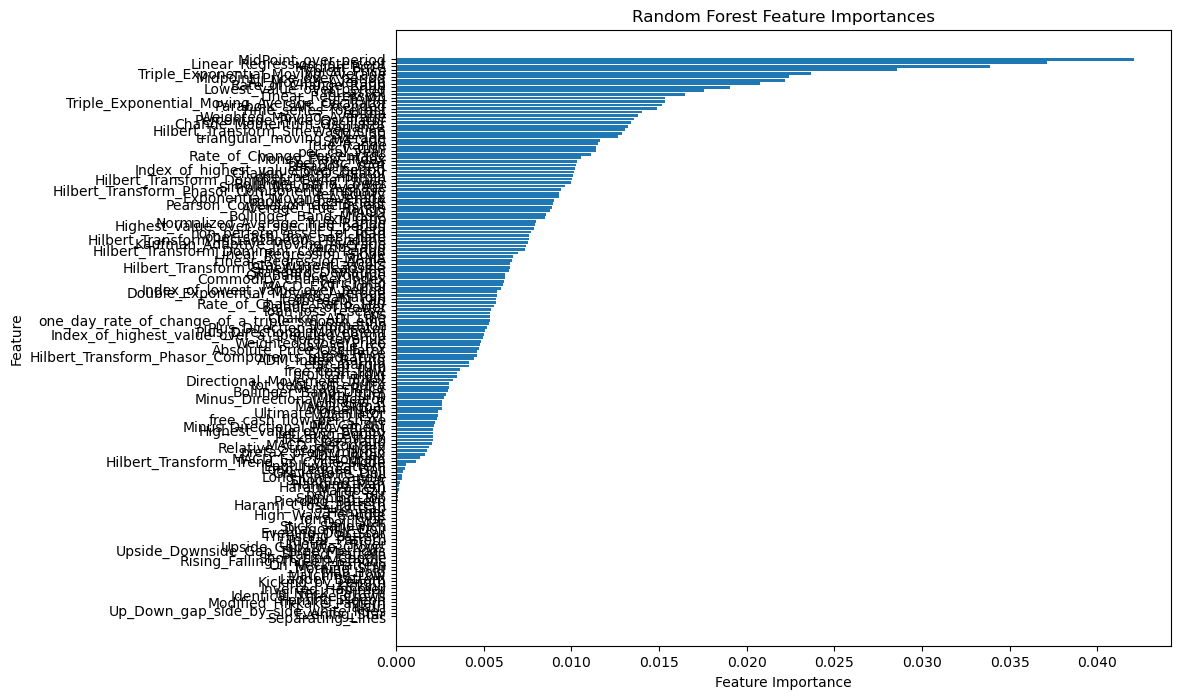

In [ ]:
# Get feature importances from the model
importances = rf.feature_importances_

# Create a DataFrame for easier viewing and sorting
feature_importance_df = pd.DataFrame({
    'Feature': x_train_numeric_scaled_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.show()

In [ ]:
features = feature_importance_df[feature_importance_df['Importance'] > 0.005]
features.shape

(79, 2)

In [ ]:
features.head(15)

,Feature,Importance
148,MidPoint_over_period,0.04210902
108,Linear_Regression_Intercept,0.03715052
146,Median_Price,0.03390471
132,Typical_Price,0.02857921
155,Triple_Exponential_Moving_Average,0.02366051
149,Midpoint_Price_over_period,0.02243631
118,All_Moving_Average,0.02218146
110,Rate_of_Change_Ratio,0.02074677
150,Lowest_value_over_period,0.01904505
29,ret_asset,0.01756162


In [ ]:
x_train_red = x_train_numeric_scaled_df[features['Feature']]
x_valid_red = x_valid_numeric_scaled_df[features['Feature']]
x_test_red = x_test_numeric_scaled_df[features['Feature']]
x_train_red.shape

(9208, 79)

In [ ]:
rf = RandomForestRegressor(random_state=1)
rf.fit(x_train_red, y_train)

# Optionally, predict and evaluate on the validation set
y_valid_pred_red = rf.predict(x_valid_red)
mse_valid_red = mean_squared_error(y_valid, y_valid_pred_red)
print("Validation MSE:", mse_valid_red)

Validation MSE: 18.169724516113032


In [ ]:
# predict and then compute R2 with r2_score:
y_valid_pred_red = rf.predict(x_valid_red)
r2 = r2_score(y_valid, y_valid_pred_red)
print("R^2 score:", r2)

ss_res = np.sum((y_valid - y_valid_pred_red) ** 2)
ss_tot = np.sum((y_valid - np.mean(y_valid)) ** 2)
#r2_manual = 1 - (ss_res / ss_tot)

#print("Manual R² score:", r2_manual)
print("SS total:", ss_tot)
print("SS residual:", ss_res)

R^2 score: 0.09616392998810042
SS total: 43422.26013870794
SS residual: 39246.60495480415
